# 객체 인식(Object Recognition)

- 이미지나 비디오 내에 있는 특정 객체를 식별하고 분류하는 과정

## 하르 캐스케이드

- 2001년 폴 비올라와 마이클 존스가 소개한 객체 탐지 알고리즘
    - 특징 추출과 에이다 부스트(Adaboost) 알고리즘을 사용하여 작동하는 새로운 탐지 방법론

### 특징 추출

- 이미지는 픽셀의 그리드로 구성되어 있으며, 각 픽셀은 색상 및 강도 정보를 포함함
- 하르 캐스케이드 분류기는 이러한 픽셀 정보를 사용하여 이미지의 특정 영역에서 특징을 추출
    - 합성곱 신경망에서 이용한 특징 추출이 아닌 하르 캐스케이드 분류기 자체의 커널을 사용하여 특징 추출

<img src = "./image/HaarFeatures.png">

- 하르 캐스케이드의 특징은 일반적으로 흰색과 검은색의 직사각형 영역으로 구성되어 있음
    - 일부 커널은 수평 또는 수직 방향의 픽셀 강도 변화를 포착
    - 일부 커널은 대각선 방향의 픽셀 강도 변화를 포착
    - 다양한 사이즈와 모양의 하르 캐스케이드 특징을 사용하여 이미지의 다양한 특징을 포착

### 하르 캐스케이드의 특징의 스케일과 위치

- 이미지 내의 객체 탐지는 그 객체의 사이즈, 모양, 위치에 따라 크게 달라질 수 있음
    - 따라서 탐지 알고리즘은 다양한 사이즈와 위치에서의 객체를 모두 고려해야함
    - 이런 문제를 해결하기 위해 이미지의 다양한 위치와 다양한 사이즈로 스캔됨
    
- 하르 캐스케이드 특징의 고려사항
    - 이미지 스케일링
        - 원본 이미지를 다양한 사이즈로 재조정하여 여러 스케일의 이미지 세트를 생성
        - 각 스케일마다 하르 캐스케이드 특징을 추출하면 다양한 사이즈의 객체를 탐지하는 데 도움이 됨
        
    - 특징 스케일링
        - 하르 캐스케이드 특징 자체의 사이즈를 조절하여 다양한 사이즈의 특징을 검출
        - 특정 사이즈의 특징 패턴을 탐지하는 데 유용
        
- 이미지 내의 다양한 위치의 객체를 검출하기 위한 방법론
    - 슬라이딩 윈도우
        - 이미지 전체를 횡단하면서 지정된 사이즈의 윈도우를 슬라이드 시키는 기법
        - 각 윈도우 위치에서 하르 캐스케이드 특징을 추출하여 해당 위치에서의 객체를 탐지
        
    - 스트라이드
        - 슬라이딩 윈도우를 얼마나 빠르게 이동시킬 것인지 결정하는 값
            - 작은 값은 더 높은 해상도의 탐지를 가능하게 하지만 계산 비용이 증가

### 에이다 부스트

- 하르 캐스케이드 특징을 사용해 이미지에서 특징을 추출한 후 특징들을 분류기에 입력으로 제공
- 하지만 단일 분류기를 사용하는 것은 제한적일 수 있어, 여러 개의 분류기를 결합하여 더 강력하고 안정적인 모델을 만들 필요성이 대두됨

#### 데이터 샘플과 가중치 초기화

- 에이다 부스트 알고리즘은 학습 데이터 세트의 모든 데이터 샘플에 동일한 가중치를 할당

- 반복적인 학습
    - 각 반복마다 약한 학습기는 현재의 가중치가 부여된 학습 데이터 세트에 적용
    - 학습기는 데이터 샘플의 가중치를 고려하여 학습됨
        - 이전 반복에서 잘못 분류된 샘플에 더 집중
    - 학습된 약한 학습기의 성능을 평가하여 그 오차를 기반으로 학습기 자체에 가중치를 부여

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# 이미지 로드
image = cv2.imread("./image/three_young_man.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

- 하르 캐스케이드는 그레이 스케일 이미지에서 작동
    - 이미지를 그레이 스케일로 변환하고 하르 캐스케이드 작동 이후 다시 색조 이미지로 시각화

In [3]:
# 하르 캐스케이드 로드
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

- cv2.CascadeClassifier
    - 하르 캐스케이드 분류기를 로드
    - opencv에는 사전 훈련된 여러 하르 캐스케이드 XML 파일이 포함되어 있음
    - 주요 분류기 목록
        - 정면 얼굴 탐지
        - 프로필 얼굴(측면 얼굴) 탐지
        - 눈 탐지
        - 안경을 착용한 눈 탐지
        - 웃는 얼굴 탐지
        - 상체 탐지
        - 하체 탐지
        - 전체 몸체 탐지
        - 코 탐지
        - 입 탐지
        - 귀 탐지
    - 위 XML 파일들은 opencv 설치 경로 내의 data/haarcascades 디렉터리에 위치

In [4]:
# 얼굴 탐지
faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
faces

array([[449, 111, 173, 173],
       [721, 106, 170, 170],
       [159, 148, 160, 160],
       [371, 376, 116, 116]])

- 반환되는 결과는 탐지된 얼굴의 위치(x, y)와 사이즈(width, height)를 나타내는 사각형 목록

In [5]:
# 탐지된 얼굴에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

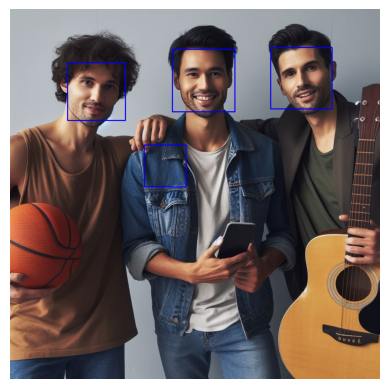

In [6]:
# 결과 표시
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

- 하르 캐스케이드는 이미지 내의 객체를 빠르게 탐지하는 데 매우 효과적
    - 하지만 모든 상황에서 완벽한 결과를 제공하는 것은 아님
    - 이미지의 조명, 객체의 방향, 이미지 내의 다른 객체 와의 상호 작용 등 여러 요소로 탐지가 완벽하지 않을 수 있음
    
- 하르 캐스케이드는 적은 자원으로 실시간 처리와 같은 상황에서 빠른 탐지가 필요할 때 특히 유용
    - 높은 정확도와 정밀도가 필요한 애플리케이션의 경우 추가적인 최적화와 세밀한 조정이 필요할 수 있음